## Intonation analysis example

### Imports

In [1]:
# numpy and matplotlib-related
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

In [2]:
# other funky imports
import bz2
from xml.etree import ElementTree

### Constants and helper functions

In [3]:
fs = 44100

In [6]:
def freq2pitch(f):
    return 69.0 + 12.0 * np.log2(f*1.0/440.0)

### Reference data
This is just the equivalent of the score. We provide the nominal pitches of Happy Birthday in semitones, with one repeat.

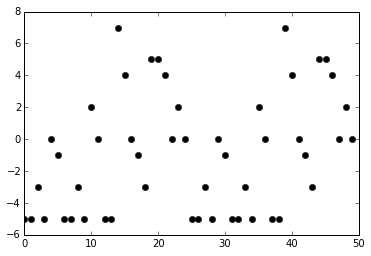

In [7]:
score_pitch = [-5,-5,-3,-5,0,-1,-5,-5,-3,-5,2,0,-5,-5,7,4,0,-1,-3,5,5,4,0,2,0]
score_pitch.extend(score_pitch)
score_int   = [np.nan]
score_int = np.hstack([np.array([np.nan]), np.diff(score_pitch)])
plt.plot(score_pitch, 'ko')

### Import note data

## Slightly advanced importing

In [4]:
# functions to load data
def decode_dataset(ds):
    out = [dict(point.items()) for point in ds]
    return out
def load_pitch_from_ton(ton_fn):
    f = bz2.BZ2File(ton_fn) # ton files are really xml hidden in bzip2 files!
    data = ElementTree.parse(f)
    note_ds, pitch_ds =  data.getroot().find('data').findall('dataset')
    return decode_dataset(note_ds), decode_dataset(pitch_ds)

In [5]:
# functions to extract information from note dictionaries
def get_pitch(notes):
    return [freq2pitch(float(n['value'])) for n in notes]
def get_onset(notes):
    return [int(n['frame']) * 1.0 / fs for n in notes]
def get_duration(notes):
    return [int(n['duration']) * 1.0 / fs for n in notes]

### Load and prepare singing data

We're just going to import a couple of .ton files, each with 2 consecutive runs of Happy Birthday.

In [8]:
notes1, pitches1 = load_pitch_from_ton("HappyBirthday_mm.ton")
notes2, pitches2 = load_pitch_from_ton("HappyBirthday_mm2.ton")

In [9]:
fs = 44100

note_p1 = get_pitch(notes1)
note_t1 = get_onset(notes1)
note_d1 = get_duration(notes1)
note_i1 = np.hstack([np.array([np.nan]), np.diff(note_p1)])

note_p2 = get_pitch(notes2)
note_t2 = get_onset(notes2)
note_d2 = get_duration(notes2)
note_i2 = np.hstack([np.array([np.nan]), np.diff(note_p2)])

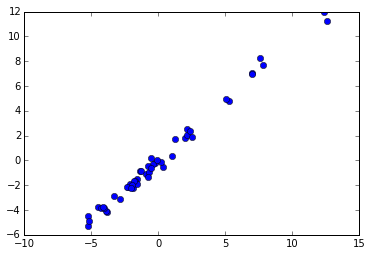

In [10]:
len(note_i1)
plt.plot(note_i1, note_i2, 'bo')